### MINOR PROJECT

#TASK-1: EDA

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Energy_consumption.csv to Energy_consumption (1).csv


In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Energy_consumption.csv')
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [114]:
df.shape

(1000, 11)

### HVACUsage, LightingUsage, Holiday, DayOfWeek - converting to 0/1

In [124]:
df['HVACUsage']=df['HVACUsage'].map({'On':1,'Off':0})

In [125]:
df['Holiday']=df['Holiday'].map({'No':0,'Yes':1})

In [126]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [127]:
days = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DayOfWeek'] = df['DayOfWeek'].map(days)

In [128]:
df

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,0,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,5,0,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,6,0,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,2,0,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,4,0,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,0,0,21.194696,5,0,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,0,1,25.748176,1,1,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,0,1,0.297079,4,1,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,1,0,20.425163,3,1,76.950389


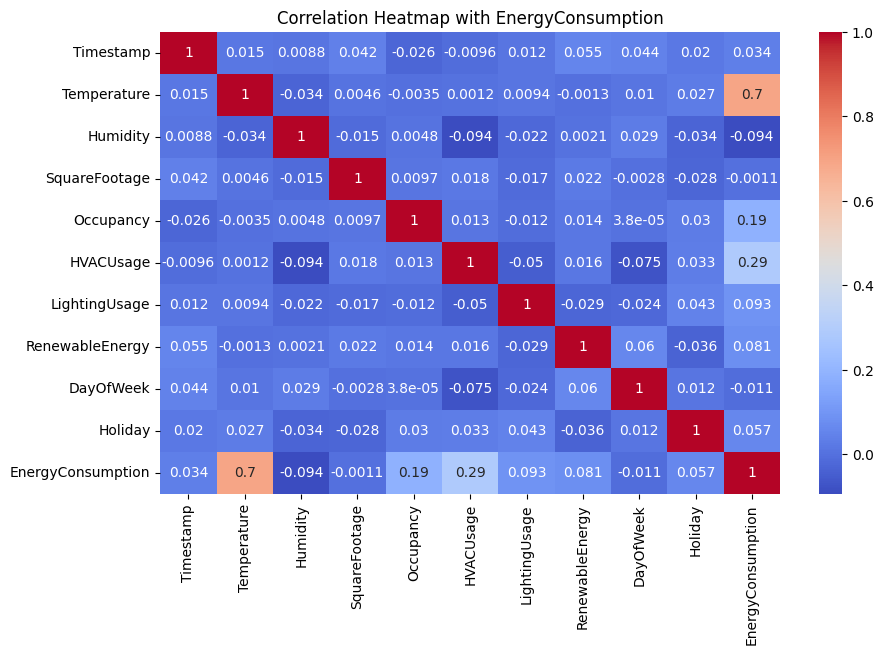

In [129]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with EnergyConsumption")
plt.show()

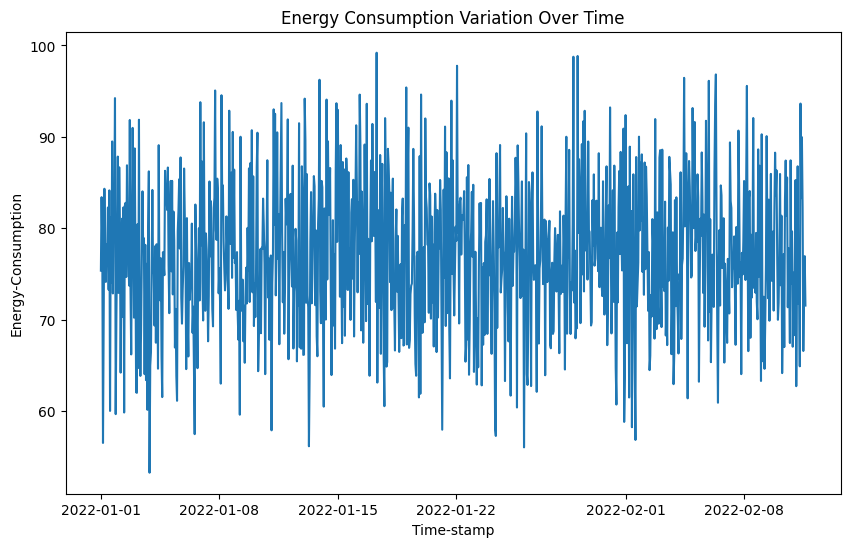

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['EnergyConsumption'])
plt.xlabel('Time-stamp')
plt.ylabel('Energy-Consumption')
plt.title('Energy Consumption Variation Over Time')
plt.show()

###There is no pattern in this basically.

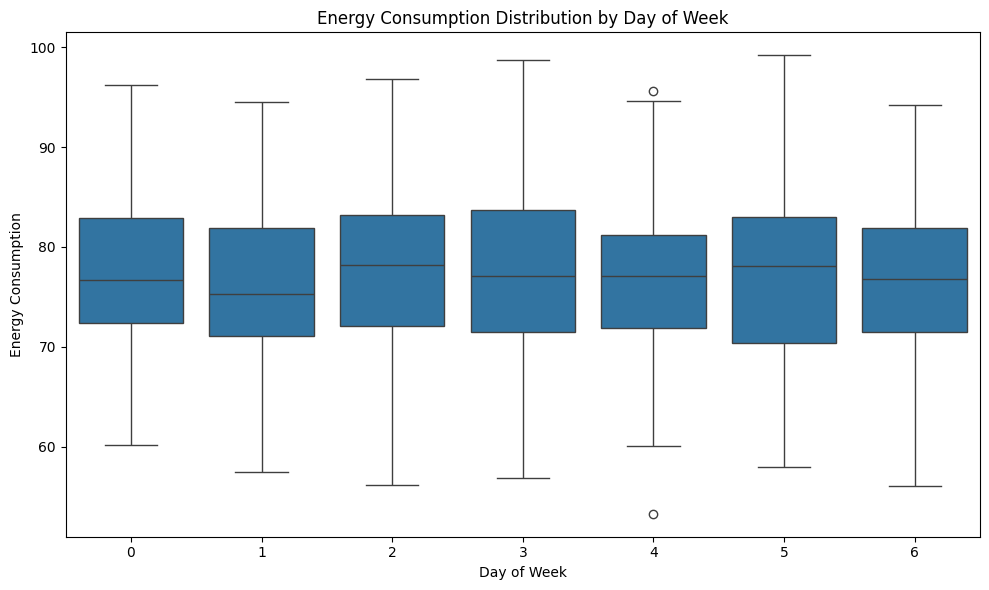

In [141]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='DayOfWeek', y='EnergyConsumption')
plt.title("Energy Consumption Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Energy Consumption")
plt.tight_layout()
plt.show()

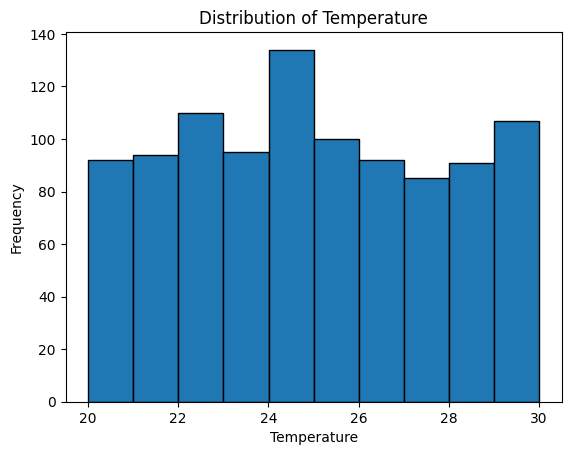

In [147]:
plt.hist(df['Temperature'],edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

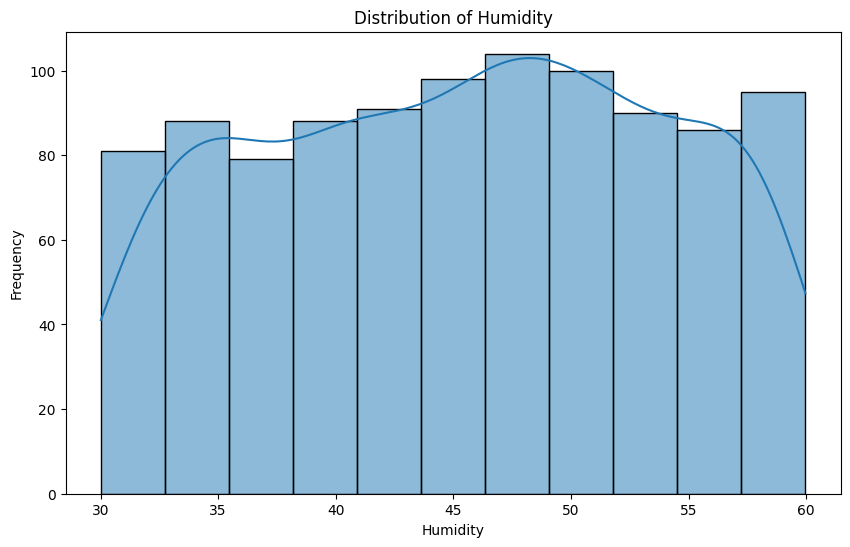

In [150]:
plt.figure(figsize=(10,6))
sns.histplot(df['Humidity'],kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

##Space-Usage Efficiency Dependency

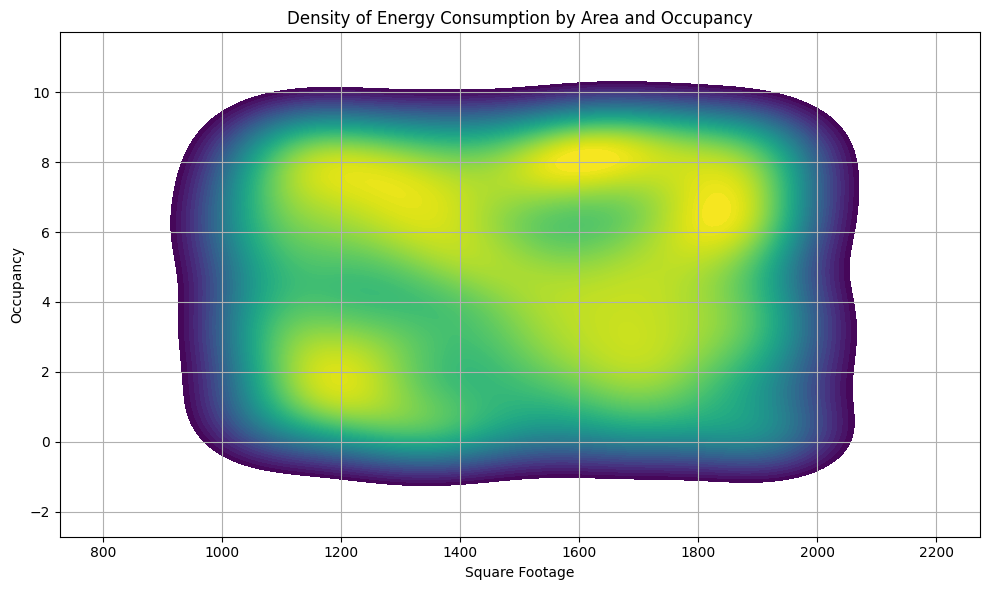

In [155]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='SquareFootage',
    y='Occupancy',
    weights=df['EnergyConsumption'],  # Weighting by actual energy use
    cmap='viridis',
    fill=True,
    thresh=0.05,
    levels=100
)
plt.title('Density of Energy Consumption by Area and Occupancy')
plt.xlabel('Square Footage')
plt.ylabel('Occupancy')
plt.grid(True)
plt.tight_layout()
plt.show()

### Here Bright Color means it has Higher Energy Consumption in (area-occupancy) areas & vice-versa.
##### Less area more occupancy-> less consumption
##### More area less occupancy-> more consumption

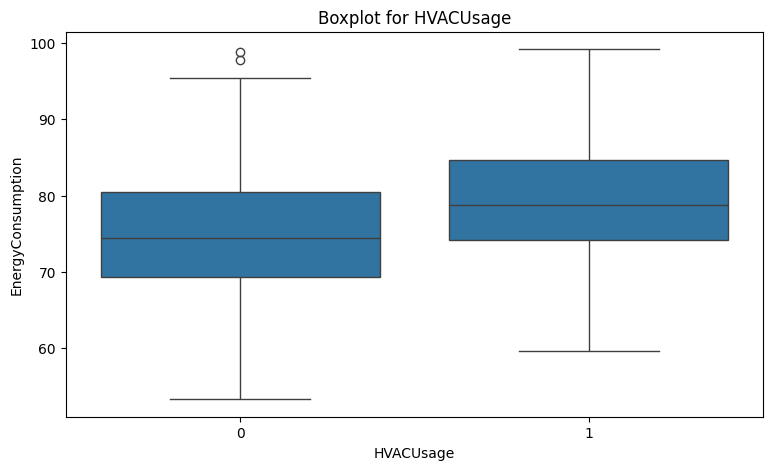

In [239]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df,x='HVACUsage',y='EnergyConsumption')
plt.title('Boxplot for HVACUsage')
plt.show()

#TASK-2: ML MODEL

### Training a Linear regression Model to predict Energy-Consumption.

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()

In [218]:
X=df[['Temperature','Humidity','SquareFootage','Occupancy','HVACUsage']]
Y=df['EnergyConsumption']

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=120)
print('Training dataset shape:', X_train.shape, Y_train.shape)
print('Testing dataset shape:', X_test.shape, Y_test.shape)

Training dataset shape: (700, 5) (700,)
Testing dataset shape: (300, 5) (300,)


In [230]:
model.fit(X_train,Y_train)

LinearRegression()

In [231]:
score = model.score(X_test, Y_test)
print(score)

0.6488977023022274
